In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ========= Step 1：讀取資料 =========
df = pd.read_csv('財報_eps_data.csv', encoding='utf-8-sig')

# ========= Step 2：欄位重命名 =========
# 將「業外收入比」改為「業外稅前比」
df = df.rename(columns={
    '業外收入比': '業外稅前比'
})

# ========= Step 3：特徵處理 =========
# 去除 EPS 缺漏值
df = df.dropna(subset=['EPS'])

# 要用的特徵欄位（可依實際資料調整）
feature_cols = [
    '財報_營業收入', '財報_營業損益', '財報_業外收入', '財報_稅前損益',
    '營業損益比', '業外稅前比', '營收成長_季平均', '季均價'
]

# 去除含有缺漏值的樣本
df = df.dropna(subset=feature_cols)

# X = 特徵, y = 目標 (EPS)
X = df[feature_cols]
y = df['每股EPS']

# ========= Step 4：訓練 / 測試資料分割 =========
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ========= Step 5：建立並訓練模型 =========
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ========= Step 6：預測與評估 =========
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE（均方誤差）: {mse:.4f}")
print(f"📈 R² Score（解釋力）: {r2:.4f}")

# ========= Step 7：特徵重要性 =========
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=True)

print("\n🔍 特徵重要性（由小到大）：")
print(feat_imp)

# ========= Step 8：視覺化特徵重要性 =========
plt.figure(figsize=(8, 6))
feat_imp.plot(kind='barh', color='skyblue')
plt.title('🎯 Feature Importance: 預測 EPS')
plt.xlabel('重要性')
plt.tight_layout()
plt.show()


KeyError: ['EPS']

📊 MSE（均方誤差）: 4115.8053
📈 R² Score（解釋力）: 0.9077

🔍 特徵重要性（由小到大）：
營業損益     0.016110
稅前損益     0.019000
業外%      0.032999
營業收入     0.034167
業外收入     0.038183
營業利益率    0.109993
EPS      0.749548
dtype: float64


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\3731336454.py:73: UserWarning: Glyph 37325 (\N{CJK UNIFIED IDEOGRAPH-91CD}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\3731336454.py:73: UserWarning: Glyph 35201 (\N{CJK UNIFIED IDEOGRAPH-8981}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\3731336454.py:73: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\3731336454.py:73: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\3731336454.py:73: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\3731336454.py:73: UserWarni

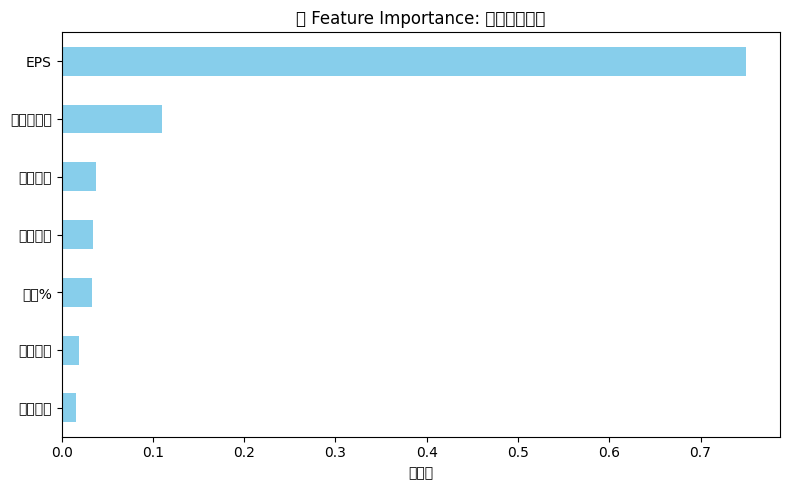

In [5]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# ========= Step 1：讀取資料 =========
df_fin = pd.read_csv('financial_eps_with_ratios.csv', encoding='utf-8-sig')
df_price = pd.read_csv('quarterly_avg_price.csv', encoding='utf-8-sig')

# ========= Step 2：欄位整理 =========
# 統一主鍵欄位格式
df_fin['公司代號'] = df_fin['公司代號'].astype(str).str.strip()
df_fin['year_quarter'] = df_fin['year_quarter'].astype(str).str.strip()
df_price['公司代號'] = df_price['公司代號'].astype(str).str.strip()
df_price['year_quarter'] = df_price['year_quarter'].astype(str).str.strip()

# ========= Step 3：合併資料 =========
df_merged = pd.merge(df_fin, df_price, on=['公司代號', 'year_quarter'], how='inner')

# ========= Step 4：定義特徵與目標欄位 =========
target = '季均價'

feature_cols = [
    '營業收入', '營業損益', '業外收入', '稅前損益',
    'EPS', '營業利益率', '業外%'
]

# ========= Step 5：資料清理 =========
# 處理 inf 與 nan
X = df_merged[feature_cols].replace([np.inf, -np.inf], np.nan)
y = df_merged[target]

# 合併後刪除缺漏值
df_clean = X.copy()
df_clean['y'] = y
df_clean = df_clean.dropna()

X_clean = df_clean.drop(columns='y')
y_clean = df_clean['y']

# ========= Step 6：切分訓練與測試集 =========
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.2, random_state=42
)

# ========= Step 7：訓練模型 =========
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ========= Step 8：預測與評估 =========
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE（均方誤差）: {mse:.4f}")
print(f"📈 R² Score（解釋力）: {r2:.4f}")

# ========= Step 9：特徵重要性 =========
importances = model.feature_importances_
feat_imp = pd.Series(importances, index=feature_cols).sort_values(ascending=True)

print("\n🔍 特徵重要性（由小到大）：")
print(feat_imp)

# ========= Step 10：視覺化 =========
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh', color='skyblue')
plt.title('📊 Feature Importance: 預測季均股價')
plt.xlabel('重要性')
plt.tight_layout()
plt.show()


📊 MSE: 6436.1920
📈 R² Score: 0.7930

🔍 特徵重要性：
稅前損益            0.007507
營業損益            0.008514
業外收入            0.016770
業外%             0.018799
營收成長_年季平均(%)    0.019912
營業收入            0.031684
營業利益率           0.087754
EPS             0.809060
dtype: float64


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\1984994393.py:63: UserWarning: Glyph 31237 (\N{CJK UNIFIED IDEOGRAPH-7A05}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\1984994393.py:63: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\1984994393.py:63: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\1984994393.py:63: UserWarning: Glyph 30410 (\N{CJK UNIFIED IDEOGRAPH-76CA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\1984994393.py:63: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\1984994393.py:63: UserWarni

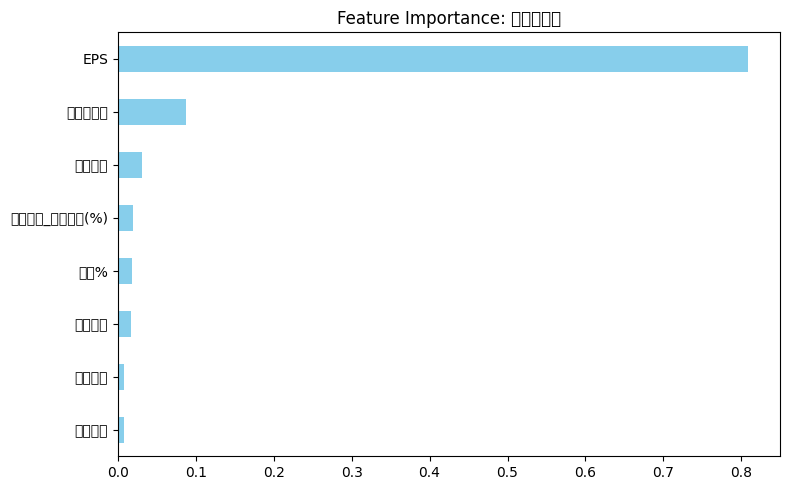

c:\Users\Robby1206\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 29151 (\N{CJK UNIFIED IDEOGRAPH-71DF}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Robby1206\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 26989 (\N{CJK UNIFIED IDEOGRAPH-696D}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Robby1206\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25910 (\N{CJK UNIFIED IDEOGRAPH-6536}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Robby1206\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\Robby1206\AppData\Local\Programs\Python\Python313\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 25613 (\N{CJK UNIFIED IDEOGRAPH-640D}) miss

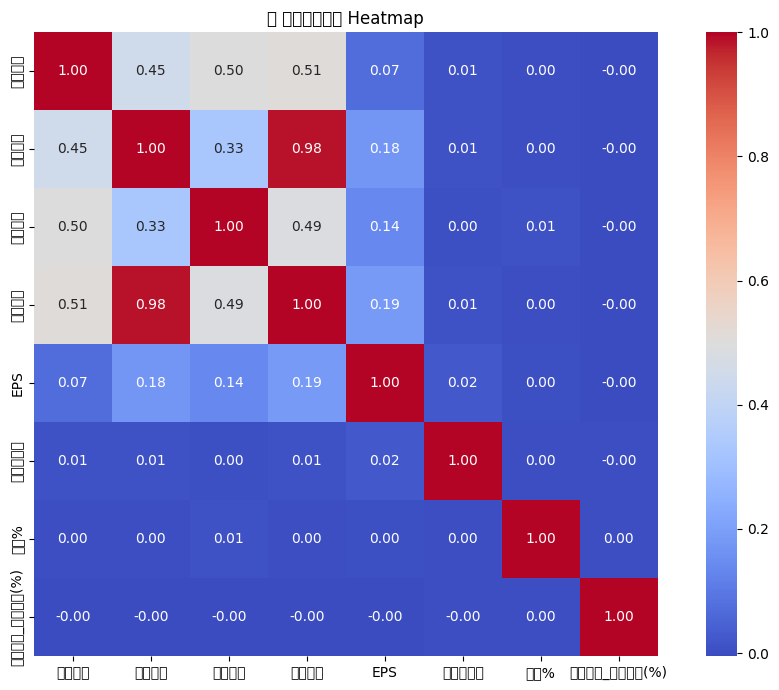


📈 特徵對預測目標的偏依關係（Partial Dependence）


TypeError: PartialDependenceDisplay.from_estimator() got an unexpected keyword argument 'figsize'

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import matplotlib.pyplot as plt
import seaborn as sns

# ========= Step 1：讀取資料 =========
df_fin = pd.read_csv('financial_eps_with_ratios.csv', encoding='utf-8-sig')
df_price = pd.read_csv('quarterly_avg_price.csv', encoding='utf-8-sig')
df_revenue = pd.read_csv('quarterly_revenue_cleaned.csv', encoding='utf-8-sig')

# ========= Step 2：欄位整理與合併 =========
for df in [df_fin, df_price, df_revenue]:
    df['公司代號'] = df['公司代號'].astype(str).str.strip()
    df['year_quarter'] = df['year_quarter'].astype(str).str.strip()

# 合併三份資料
df = df_fin.merge(df_price, on=['公司代號', 'year_quarter'], how='inner')\
           .merge(df_revenue, on=['公司代號', 'year_quarter'], how='left')

# ========= Step 3：選擇特徵與目標 =========
target = '季均價'
feature_cols = [
    '營業收入', '營業損益', '業外收入', '稅前損益', 'EPS',
    '營業利益率', '業外%', '營收成長_年季平均(%)'
]

# ========= Step 4：清理資料 =========
X = df[feature_cols].replace([np.inf, -np.inf], np.nan)
y = df[target]
df_model = X.copy()
df_model['y'] = y
df_model = df_model.dropna()

X_clean = df_model.drop(columns='y')
y_clean = df_model['y']

# ========= Step 5：訓練模型 =========
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ========= Step 6：模型評估 =========
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

# ========= Step 7：特徵重要性 =========
feat_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=True)
print("\n🔍 特徵重要性：")
print(feat_imp)

# 視覺化特徵重要性
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh', color='skyblue')
plt.title('Feature Importance: 預測季均價')
plt.tight_layout()
plt.show()

# ========= Step 8：特徵間的相關性（互相影響） =========
plt.figure(figsize=(10, 7))
corr = X_clean.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("📊 特徵間相關性 Heatmap")
plt.tight_layout()
plt.show()

# ========= Step 9：Partial Dependence Plot (偏依圖) =========
print("\n📈 特徵對預測目標的偏依關係（Partial Dependence）")
features_to_plot = ['EPS', '營收成長_年季平均(%)', '營業利益率']
PartialDependenceDisplay.from_estimator(model, X_clean, features_to_plot, kind="average", figsize=(10, 6))
plt.tight_layout()
plt.show()


📊 MSE: 15763.0672
📈 R² Score: 0.7059

📋 特徵重要性（含 0）：
營收成長_年季平均(%)    0.019368
營業收入            0.022365
稅前損益            0.023456
營業損益            0.025952
業外%             0.026925
業外收入            0.039658
營業利益率           0.076052
EPS             0.766224
dtype: float64


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\2020726228.py:69: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


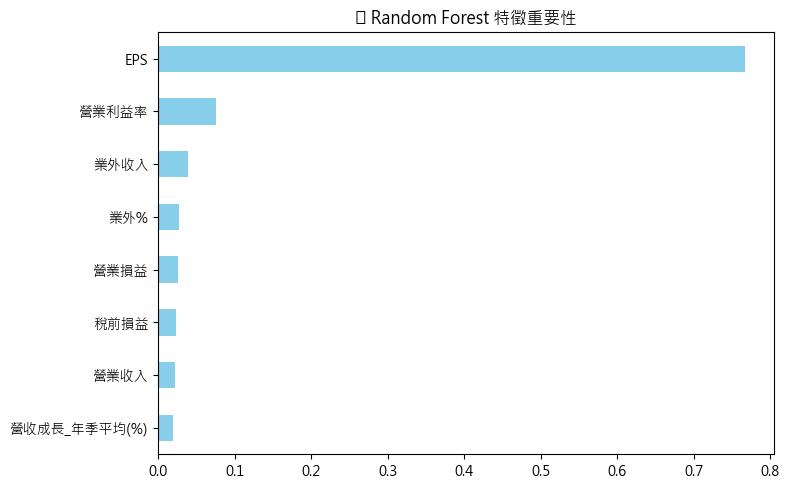


🔁 Permutation Importance（更準）：
稅前損益           -0.013525
營業損益           -0.010483
營業收入           -0.004549
營收成長_年季平均(%)    0.000972
業外收入            0.002869
業外%             0.022322
營業利益率           0.104036
EPS             1.103248
dtype: float64


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\2020726228.py:82: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


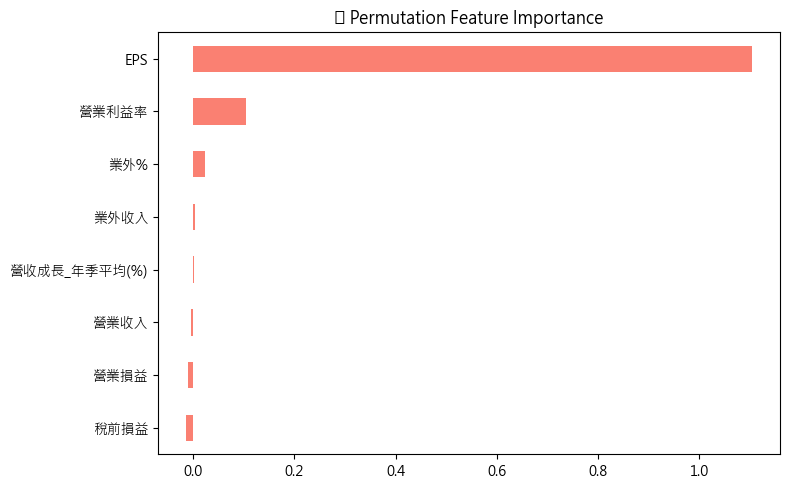

C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\2020726228.py:89: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129518 (\N{ABACUS}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


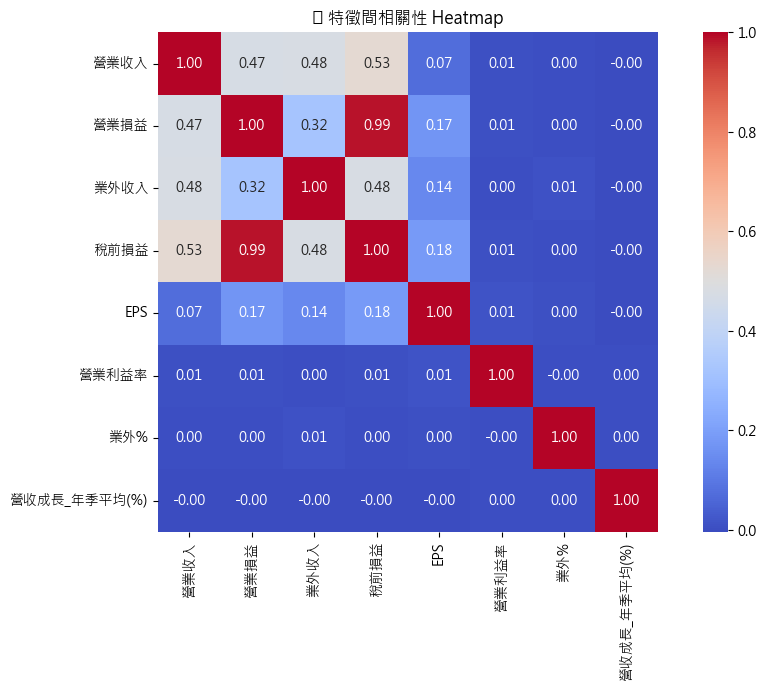


📈 特徵對預測目標的偏依關係（Partial Dependence）


TypeError: PartialDependenceDisplay.from_estimator() got an unexpected keyword argument 'figsize'

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay


# 設定中文字型
plt.rcParams['font.family'] = 'Microsoft JhengHei'  # 微軟正黑體（Windows）
plt.rcParams['axes.unicode_minus'] = False          # 正確顯示負號

# ========== Step 1：讀取資料 ==========
df_fin = pd.read_csv('financial_eps_with_ratios.csv', encoding='utf-8-sig')
df_price = pd.read_csv('quarterly_avg_price.csv', encoding='utf-8-sig')
df_revenue = pd.read_csv('quarterly_revenue_cleaned.csv', encoding='utf-8-sig')

# ========== Step 2：標準化主鍵欄位 ==========
for df in [df_fin, df_price, df_revenue]:
    df['公司代號'] = df['公司代號'].astype(str).str.strip()
    df['year_quarter'] = df['year_quarter'].astype(str).str.strip()

# ========== Step 3：合併三份資料 ==========
df = df_fin.merge(df_price, on=['公司代號', 'year_quarter'], how='inner') \
           .merge(df_revenue, on=['公司代號', 'year_quarter'], how='left')

# Step 4：特徵與目標欄位
X = df[feature_cols]
y = df[target]

# Step 4.1：處理 inf → NaN，避免模型報錯
X = X.replace([np.inf, -np.inf], np.nan)

# Step 5：補值
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=feature_cols)


# ========== Step 6：切分資料 ==========
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# ========== Step 7：建立模型 ==========
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ========== Step 8：模型評估 ==========
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE: {mse:.4f}")
print(f"📈 R² Score: {r2:.4f}")

# ========== Step 9：顯示完整特徵重要性（含為 0 的） ==========
feat_imp = pd.Series(model.feature_importances_, index=feature_cols).sort_values(ascending=True)

print("\n📋 特徵重要性（含 0）：")
print(feat_imp)

# 視覺化
plt.figure(figsize=(8, 5))
feat_imp.plot(kind='barh', color='skyblue')
plt.title('📊 Random Forest 特徵重要性')
plt.tight_layout()
plt.show()

# ========== Step 10：Permutation Importance（更準） ==========
perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = pd.Series(perm_result.importances_mean, index=feature_cols).sort_values(ascending=True)

print("\n🔁 Permutation Importance（更準）：")
print(perm_importance)

plt.figure(figsize=(8, 5))
perm_importance.plot(kind='barh', color='salmon')
plt.title('📊 Permutation Feature Importance')
plt.tight_layout()
plt.show()

# ========== Step 11：特徵相關性 Heatmap ==========
plt.figure(figsize=(10, 7))
sns.heatmap(X_imputed.corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title("🧮 特徵間相關性 Heatmap")
plt.tight_layout()
plt.show()

# ========== Step 12：偏依圖（Partial Dependence Plot） ==========
print("\n📈 特徵對預測目標的偏依關係（Partial Dependence）")
features_to_plot = ['EPS', '營收成長_年季平均(%)', '營業利益率']
PartialDependenceDisplay.from_estimator(model, X_imputed, features_to_plot, kind='average', figsize=(10, 6))
plt.tight_layout()
plt.show()


📊 MSE（均方誤差）: 41784.6126
📈 R² Score（解釋力）: 0.2205


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\237389947.py:64: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()


<Figure size 1000x500 with 0 Axes>

C:\Users\Robby1206\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


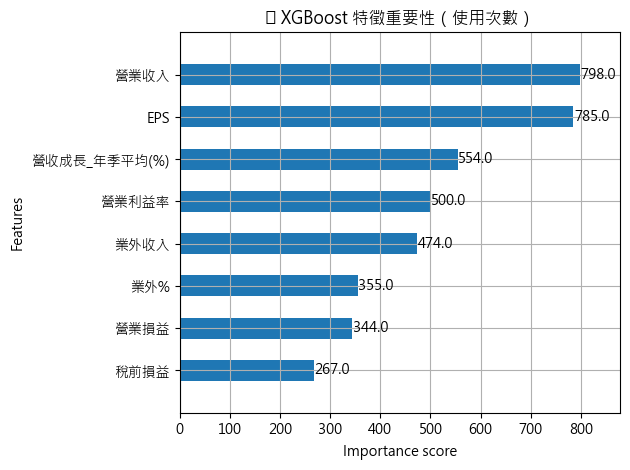


🔁 Permutation Importance：
營業收入           -0.417815
營業利益率          -0.050822
稅前損益           -0.003178
業外%            -0.001652
業外收入            0.001695
營業損益            0.004856
營收成長_年季平均(%)    0.009660
EPS             0.297616
dtype: float64


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\237389947.py:77: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


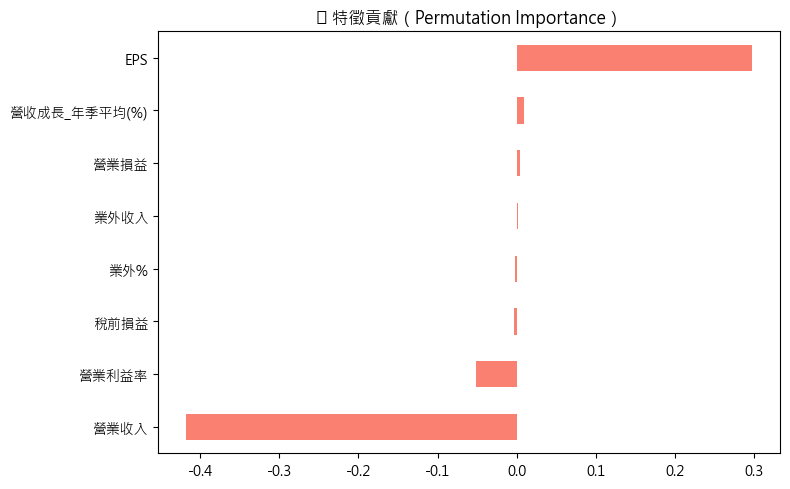

C:\Users\Robby1206\AppData\Local\Temp\ipykernel_1236\237389947.py:84: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
C:\Users\Robby1206\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


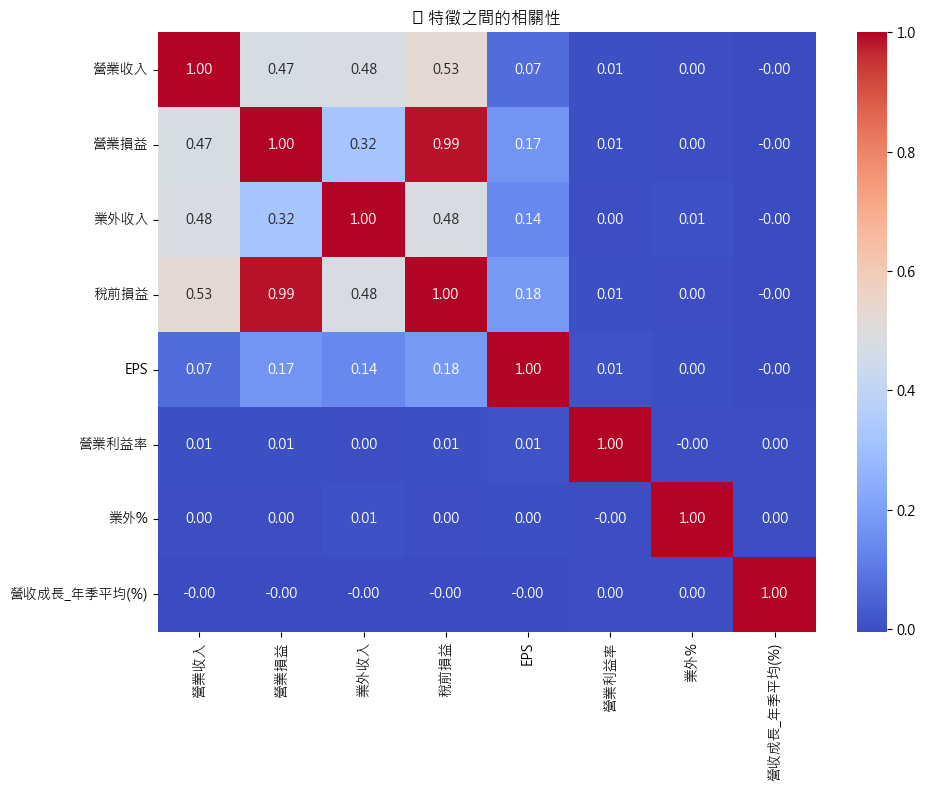


📈 偏依圖（Partial Dependence）


TypeError: PartialDependenceDisplay.from_estimator() got an unexpected keyword argument 'figsize'

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

# ✅ 中文字型設定（避免亂碼）
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

# ========= Step 1：讀取資料 =========
df_fin = pd.read_csv('financial_eps_with_ratios.csv', encoding='utf-8-sig')
df_price = pd.read_csv('quarterly_avg_price.csv', encoding='utf-8-sig')
df_revenue = pd.read_csv('quarterly_revenue_cleaned.csv', encoding='utf-8-sig')

# ========= Step 2：欄位處理與合併 =========
for df in [df_fin, df_price, df_revenue]:
    df['公司代號'] = df['公司代號'].astype(str).str.strip()
    df['year_quarter'] = df['year_quarter'].astype(str).str.strip()

df = df_fin.merge(df_price, on=['公司代號', 'year_quarter'], how='inner') \
           .merge(df_revenue, on=['公司代號', 'year_quarter'], how='left')

# ========= Step 3：特徵與目標欄位 =========
target = '季均價'
feature_cols = [
    '營業收入', '營業損益', '業外收入', '稅前損益',
    'EPS', '營業利益率', '業外%', '營收成長_年季平均(%)'
]

# Step 4：處理 inf → NaN
X = df[feature_cols].replace([np.inf, -np.inf], np.nan)
y = df[target]

# Step 5：補值（中位數填補 NaN）
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=feature_cols)

# Step 6：切分資料集
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# ========= Step 7：建立 XGBoost 模型 =========
model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

# ========= Step 8：預測與評估 =========
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE（均方誤差）: {mse:.4f}")
print(f"📈 R² Score（解釋力）: {r2:.4f}")

# ========= Step 9：XGBoost 特徵重要性（內建） =========
plt.figure(figsize=(10, 5))
plot_importance(model, importance_type='weight', height=0.5, max_num_features=20)
plt.title("📊 XGBoost 特徵重要性（使用次數）")
plt.tight_layout()
plt.show()

# ========= Step 10：Permutation Importance（模型無關） =========
perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = pd.Series(perm_result.importances_mean, index=feature_cols).sort_values()

print("\n🔁 Permutation Importance：")
print(perm_importance)

plt.figure(figsize=(8, 5))
perm_importance.plot(kind='barh', color='salmon')
plt.title('🔁 特徵貢獻（Permutation Importance）')
plt.tight_layout()
plt.show()

# ========= Step 11：特徵相關性 Heatmap =========
plt.figure(figsize=(10, 8))
sns.heatmap(X_imputed.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("📌 特徵之間的相關性")
plt.tight_layout()
plt.show()

# ========= Step 12：偏依圖（PDP）特徵對預測影響 =========
print("\n📈 偏依圖（Partial Dependence）")
features_to_plot = ['EPS', '營收成長_年季平均(%)', '營業利益率']
PartialDependenceDisplay.from_estimator(model, X_imputed, features_to_plot, kind='average', figsize=(10, 6))
plt.tight_layout()
plt.show()


In [2]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


📊 MSE（均方誤差）: 33786.4302
📈 R² Score（解釋力）: 0.3697

🔁 Permutation Importance：
營業收入           -0.270043
營業損益           -0.100666
稅前損益           -0.003583
業外收入            0.001340
營收成長_年季平均(%)    0.003762
業外%             0.004908
營業利益率           0.089823
EPS             0.355633
dtype: float64


C:\Users\Robby1206\AppData\Local\Temp\ipykernel_22088\719900708.py:77: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
c:\Users\Robby1206\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128257 (\N{CLOCKWISE RIGHTWARDS AND LEFTWARDS OPEN CIRCLE ARROWS}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


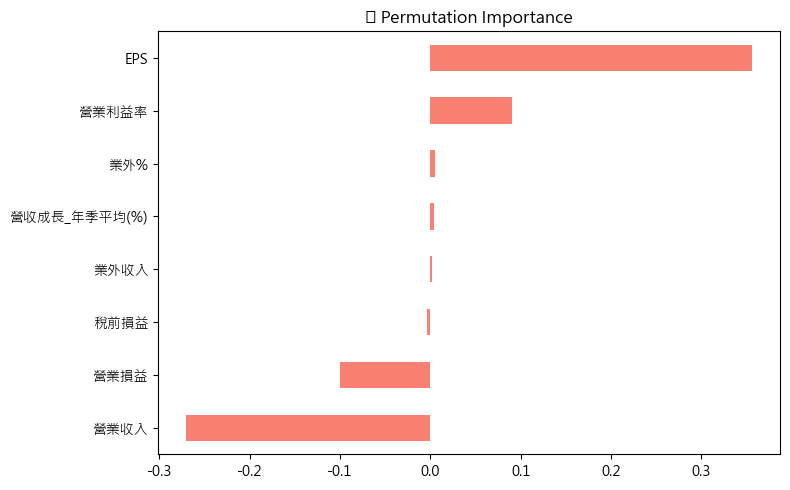

🧠 計算 SHAP 值中...


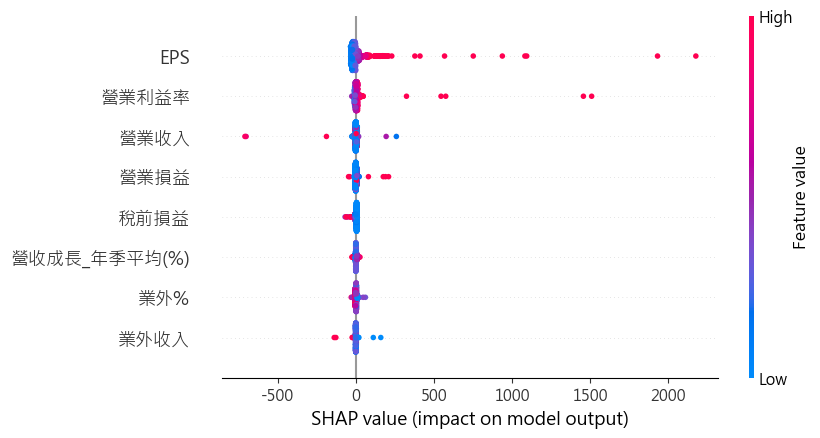

C:\Users\Robby1206\AppData\Local\Temp\ipykernel_22088\719900708.py:90: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
c:\Users\Robby1206\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


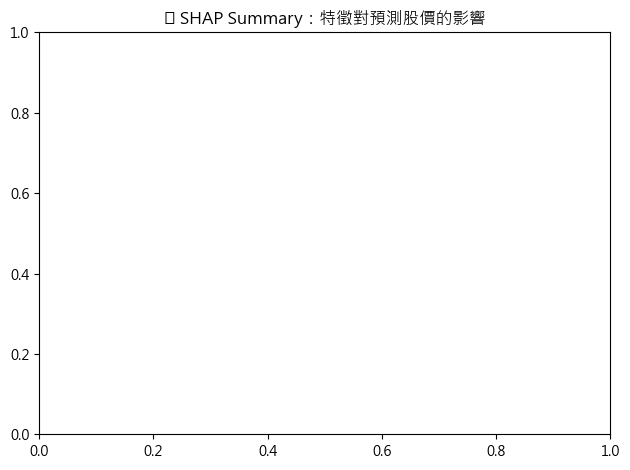

c:\Users\Robby1206\anaconda3\Lib\site-packages\shap\plots\_waterfall.py:279: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  text_bbox = txt_obj.get_window_extent(renderer=renderer)



🔍 SHAP 單一樣本解釋（第 0 筆）


c:\Users\Robby1206\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


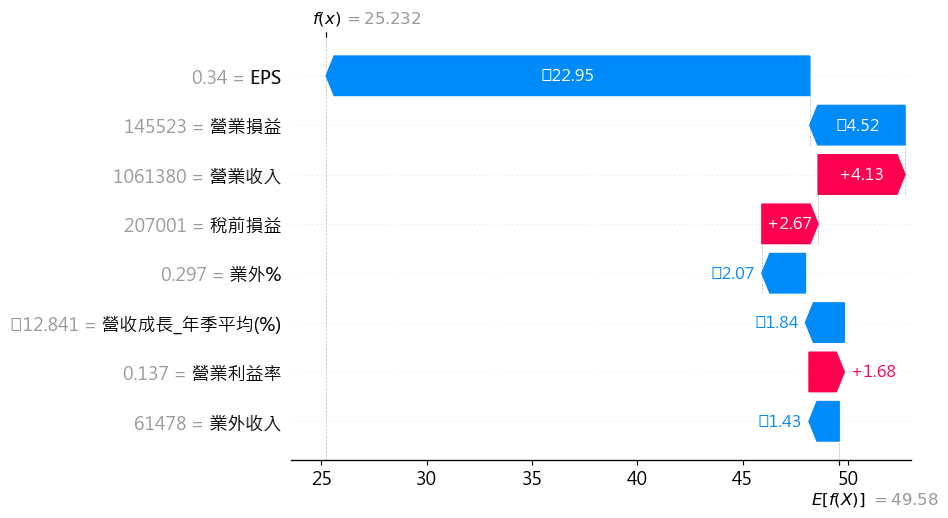

C:\Users\Robby1206\AppData\Local\Temp\ipykernel_22088\719900708.py:101: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Microsoft JhengHei.
  plt.tight_layout()
c:\Users\Robby1206\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Microsoft JhengHei.
  fig.canvas.print_figure(bytes_io, **kw)


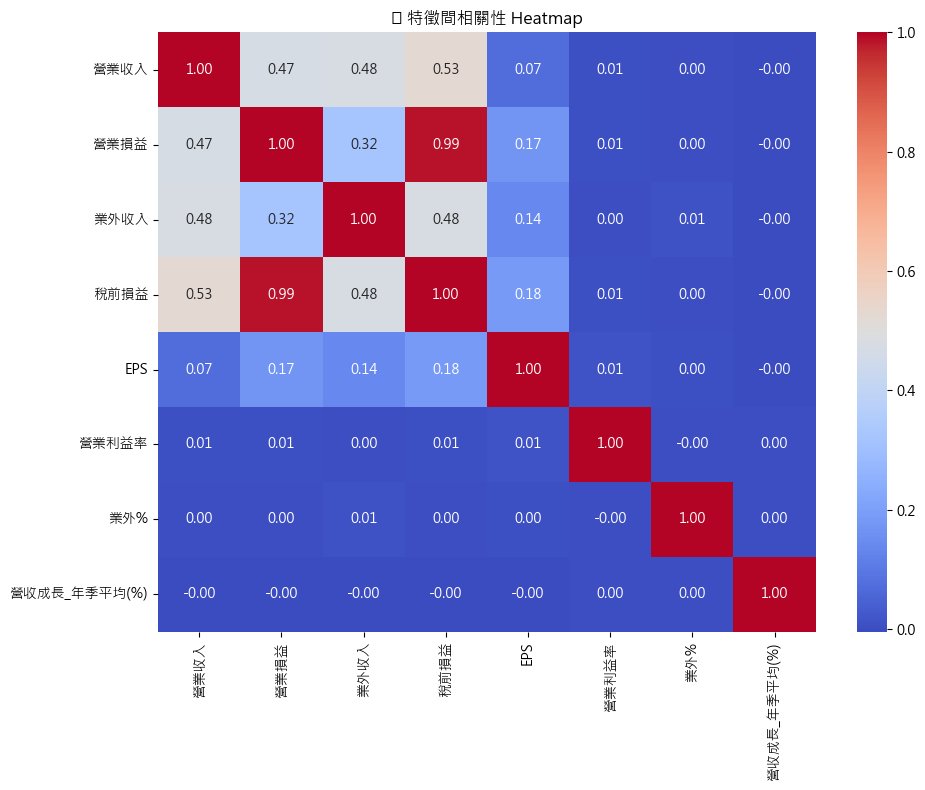

TypeError: PartialDependenceDisplay.from_estimator() got an unexpected keyword argument 'figsize'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap

# ✅ 中文字型設定（防止亂碼）
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

# ========= Step 1：讀取資料 =========
df_fin = pd.read_csv('financial_eps_with_ratios.csv', encoding='utf-8-sig')
df_price = pd.read_csv('quarterly_avg_price.csv', encoding='utf-8-sig')
df_revenue = pd.read_csv('quarterly_revenue_cleaned.csv', encoding='utf-8-sig')

# ========= Step 2：合併資料 =========
for df in [df_fin, df_price, df_revenue]:
    df['公司代號'] = df['公司代號'].astype(str).str.strip()
    df['year_quarter'] = df['year_quarter'].astype(str).str.strip()

df = df_fin.merge(df_price, on=['公司代號', 'year_quarter'], how='inner') \
           .merge(df_revenue, on=['公司代號', 'year_quarter'], how='left')

# ========= Step 3：特徵與目標欄位 =========
target = '季均價'
feature_cols = [
    '營業收入', '營業損益', '業外收入', '稅前損益',
    'EPS', '營業利益率', '業外%', '營收成長_年季平均(%)'
]

X = df[feature_cols].replace([np.inf, -np.inf], np.nan)
y = df[target]

# ========= Step 4：補值處理 =========
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=feature_cols)

# ========= Step 5：資料切分 =========
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=42
)

# ========= Step 6：XGBoost 模型（抑制過擬合）=========
model = XGBRegressor(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(X_train, y_train)

# ========= Step 7：預測與評估 =========
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📊 MSE（均方誤差）: {mse:.4f}")
print(f"📈 R² Score（解釋力）: {r2:.4f}")

# ========= Step 8：Permutation Importance =========
perm_result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = pd.Series(perm_result.importances_mean, index=feature_cols).sort_values()

print("\n🔁 Permutation Importance：")
print(perm_importance)

plt.figure(figsize=(8, 5))
perm_importance.plot(kind='barh', color='salmon')
plt.title('🔁 Permutation Importance')
plt.tight_layout()
plt.show()

# ========= Step 9：SHAP 分析 =========
print("🧠 計算 SHAP 值中...")

# 建立 explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# -------- SHAP 全體 summary plot --------
shap.plots.beeswarm(shap_values, max_display=10)
plt.title("📌 SHAP Summary：特徵對預測股價的影響")
plt.tight_layout()
plt.show()

# -------- SHAP 單筆分析（可改 index）--------
print("\n🔍 SHAP 單一樣本解釋（第 0 筆）")
shap.plots.waterfall(shap_values[0], max_display=10)

# ========= Step 10：特徵相關性 Heatmap =========
plt.figure(figsize=(10, 8))
sns.heatmap(X_imputed.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("📌 特徵間相關性 Heatmap")
plt.tight_layout()
plt.show()

# ========= Step 11：偏依圖 PDP =========
features_to_plot = ['EPS', '營收成長_年季平均(%)', '營業利益率']
PartialDependenceDisplay.from_estimator(model, X_imputed, features_to_plot, kind='average', figsize=(10, 6))
plt.title("📈 偏依圖（PDP）：特徵變動對股價的影響")
plt.tight_layout()
plt.show()


In [2]:
import pandas as pd

# 讀取檔案
df = pd.read_csv("financial_eps_with_ratios.csv")

# 你要保留的欄位（這些名稱需和實際欄位一致）
keep_cols = ["公司代號", "公司名稱", "營業利益率", "業外%"]

# 過濾資料（只有這幾欄）
filtered_df = df[keep_cols]

# 儲存成新檔案
filtered_df.to_csv("filtered_financial_data.csv", index=False, encoding="utf-8-sig")

print("✅ 已完成欄位過濾並儲存為 filtered_financial_data.csv")


✅ 已完成欄位過濾並儲存為 filtered_financial_data.csv
